In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data_set = pd.read_csv('Crop_production.csv')

In [3]:
data_set.head()

,Unnamed: 0,State_Name,Crop_Type,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec,Crop
0,0,andhra pradesh,kharif,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671,1
1,1,andhra pradesh,kharif,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030,3
2,2,andhra pradesh,kharif,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901,2
3,3,andhra pradesh,kharif,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000,4
4,4,andhra pradesh,kharif,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615,5


In [4]:
data_set.shape

(99827, 13)

In [5]:
data_set.describe()

,Unnamed: 0,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec,Crop
count,99827.000000,99827.000000,99827.000000,99827.000000,99827.000000,99827.000000,99827.000000,99827.000000,9.982700e+04,99827.000000,99827.000000
mean,49926.686067,69.816483,41.593907,42.036373,5.643616,701.110678,26.683940,16480.164759,3.776982e+04,3.931511,11.064642
std,28826.675865,39.571385,15.052453,28.426910,0.505298,604.762055,4.851727,43608.404049,1.222565e+05,33.875783,7.736309
min,0.000000,10.000000,10.000000,10.000000,3.820000,3.274569,1.180000,0.580000,0.000000e+00,0.000000,1.000000
25%,24956.500000,50.000000,40.000000,20.000000,5.360000,157.310000,23.106000,130.000000,1.630000e+02,0.586601,5.000000
50%,49935.000000,75.000000,40.000000,30.000000,5.540000,579.750000,27.333333,1010.000000,1.507000e+03,1.329650,9.000000
75%,74891.500000,80.000000,60.000000,50.000000,5.960000,1110.780000,29.266667,8100.000000,1.440000e+04,2.997404,16.000000
max,99848.000000,180.000000,125.000000,200.000000,7.000000,3322.060000,35.346667,726300.000000,3.530571e+06,9801.000000,54.000000


In [6]:
data_set.isnull().sum()

Unnamed: 0            0
State_Name            0
Crop_Type             0
N                     0
P                     0
K                     0
pH                    0
rainfall              0
temperature           0
Area_in_hectares      0
Production_in_tons    0
Yield_ton_per_hec     0
Crop                  0
dtype: int64

In [7]:
data_set['Crop'].value_counts()

Crop
7     11430
4      9857
5      6855
10     6291
9      6225
12     5413
2      5369
16     5323
15     5164
8      3682
1      3157
21     3139
6      2995
17     2899
3      2784
20     2562
22     2408
11     2325
23     2253
24     2138
14     1154
18     1134
13     1058
27      732
25      571
33      330
36      284
30      282
35      281
26      237
29      217
34      146
37      125
39      117
44      105
32      104
42       90
41       73
31       72
40       67
47       59
28       58
38       58
46       45
50       31
45       28
48       25
52       19
51       18
54       18
49       12
43        6
53        2
Name: count, dtype: int64

In [8]:
X = data_set.drop(columns=['State_Name','Crop_Type','Area_in_hectares','Production_in_tons','Yield_ton_per_hec','K','Crop'], axis = 1)
Y = data_set['Crop']

In [9]:
print(X)

       Unnamed: 0    N   P    pH  rainfall  temperature
0               0  120  40  5.46    654.34    29.266667
1               1   20  60  6.18    654.34    29.266667
2               2   80  40  5.42    654.34    29.266667
3               3   80  40  5.62    654.34    29.266667
4               4   20  40  5.68    654.34    29.266667
...           ...  ...  ..   ...       ...          ...
99822       99844   60  30  6.70    152.54    22.280000
99823       99845   80  40  5.68    182.50    29.200000
99824       99846   80  40  5.64    182.50    29.200000
99825       99847   80  40  5.42    152.54    22.280000
99826       99848   30  15  6.54    152.54    22.280000

[99827 rows x 6 columns]


In [10]:
print(Y)

0         1
1         3
2         2
3         4
4         5
         ..
99822     9
99823     4
99824     7
99825     7
99826    10
Name: Crop, Length: 99827, dtype: int64


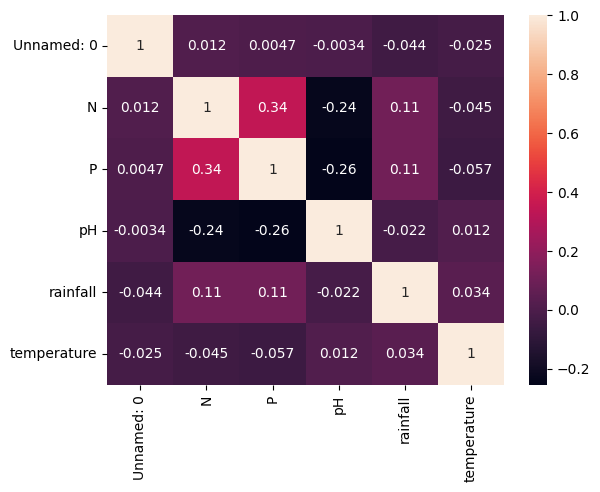

In [11]:
ax = sns.heatmap(X.corr(), annot=True)

In [12]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [13]:
standardized_data = scaler.transform(X)

In [14]:
print(standardized_data)

[[-1.73196994  1.26818327 -0.10589074 -0.36338302 -0.07733771  0.53233405]
 [-1.73193525 -1.25890796  1.22280299  1.06152694 -0.07733771  0.53233405]
 [-1.73190056  0.25734678 -0.10589074 -0.44254469 -0.07733771  0.53233405]
 ...
 [ 1.7317142   0.25734678 -0.10589074 -0.00715553 -0.8575493   0.51859317]
 [ 1.73174889  0.25734678 -0.10589074 -0.44254469 -0.90708969 -0.90771023]
 [ 1.73178358 -1.00619884 -1.76675791  1.77398193 -0.90708969 -0.90771023]]


In [15]:
X = standardized_data
Y = data_set['Crop']

In [16]:
print(X)
print(Y)

[[-1.73196994  1.26818327 -0.10589074 -0.36338302 -0.07733771  0.53233405]
 [-1.73193525 -1.25890796  1.22280299  1.06152694 -0.07733771  0.53233405]
 [-1.73190056  0.25734678 -0.10589074 -0.44254469 -0.07733771  0.53233405]
 ...
 [ 1.7317142   0.25734678 -0.10589074 -0.00715553 -0.8575493   0.51859317]
 [ 1.73174889  0.25734678 -0.10589074 -0.44254469 -0.90708969 -0.90771023]
 [ 1.73178358 -1.00619884 -1.76675791  1.77398193 -0.90708969 -0.90771023]]
0         1
1         3
2         2
3         4
4         5
         ..
99822     9
99823     4
99824     7
99825     7
99826    10
Name: Crop, Length: 99827, dtype: int64


In [17]:
X_train, X_test,Y_train,Y_test = train_test_split(X, Y, test_size=.2, stratify=Y, random_state=42)

In [18]:
print(X.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(99827, 6) (79861, 6) (19966, 6) (79861,) (19966,)


In [19]:
classifier = svm.SVC(kernel='poly')

In [20]:
classifier.fit(X_train, Y_train)

SVC(kernel='poly')

In [21]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [22]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.829654023866468


In [23]:
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [24]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8275067614945407


In [25]:
input_data = (1,20,60,6.18,654.34,0.303030303)

input_data_array = np.asarray(input_data)

input_data_reshaped = input_data_array.reshape(1, -1)

std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 1):
  print('The Crop is Cotton')

if (prediction[0] == 2):
  print('The Crop is Jowar')

if (prediction[0] == 3):
  print('The Crop is Horsegram')

if (prediction[0] == 4):
  print('The Crop is Maize')

if (prediction[0] == 5):
  print('The Crop is Moong')

if (prediction[0] == 6):
  print('The Crop is Raagi')

if (prediction[0] == 7):
  print('The Crop is Rice')

if (prediction[0] == 8):
  print('The Crop is Sunflower')

if (prediction[0] == 9):
  print('The Crop is Wheat')

if (prediction[0] == 10):
  print('The Crop is Sesamum')

if (prediction[0] == 11):
  print('The Crop is Soyabean')

if (prediction[0] == 12):
  print('The Crop is Repeseed')

if (prediction[0] == 13):
  print('The Crop is Jute')

if (prediction[0] == 14):
  print('The Crop is Arccanut')

if (prediction[0] == 15):
  print('The Crop is Onion')

if (prediction[0] == 16):
  print('The Crop is Potato')

if (prediction[0] == 17):
  print('The Crop is Sweet16')

if (prediction[0] == 18):
  print('The Crop is ')

if (prediction[0] == 19):
  print('The Crop is Tapioca')

if (prediction[0] == 20):
  print('The Crop is Turmeric')

if (prediction[0] == 21):
  print('The Crop is Barley')

if (prediction[0] == 22):
  print('The Crop is Banana')

if (prediction[0] == 23):
  print('The Crop is Coriender')

if (prediction[0] == 24):
  print('The Crop is Garlic')

# if (prediction[0] == ):
#   print('The Crop is ')





[[-1.73193525 -1.25890796  1.22280299  1.06152694 -0.07733771 -5.43745395]]
[3]
The Crop is Horsegram


c:\Users\namra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
